In [2]:
import os

import numpy as np
import torch

import matplotlib.pyplot as plt


from LFIS.config.config import get_configuration, get_baseconfig
from LFIS.LF.LF import LF_base

from LFIS.util.util import (
                    run_stat,
                    save_file,
                    load_file)

In [23]:
def check_parameter(config):
    print(f'Case: {config.case}')
    print(f'Problem: {config.problemtype}')
    print(f'Number of steps: {config.nstep}')
    print(f'Device: {config.device}')
    print(f'Number of dimension: {config.ndim}')
    print(f'Epoch: {config.train.epoch}')
    print(f'Sample size: {config.train.nsample}')
    print(f'Batch size: {config.train.nbatch}')
    print(f'Learning rate: {config.train.lr}')

In [24]:
cfg = get_baseconfig()
configurer = get_configuration()

In [25]:
case = 'funnel'

In [26]:
cfg_funnel = configurer.setup_config(cfg, case)

In [27]:
cfg_funnel.device = 'cuda:1'

In [29]:
check_parameter(cfg_funnel)

Case: 10-Dimensional Funnel Distribution
Problem: transform
Number of steps: 256
Device: cuda:1
Number of dimension: 10
Epoch: 2000
Sample size: 200000
Batch size: 20000
Learning rate: 0.01


In [30]:
trainer = cfg_funnel.train.method

In [31]:
LFmodel = LF_base(cfg_funnel)
LFmodel.to(cfg_funnel.device)

LF_base(
  (flow): NN_Base(
    (layers): Sequential(
      (0): Linear(in_features=10, out_features=64, bias=True)
      (1): Sequential(
        (0): SiLU()
        (1): Linear(in_features=64, out_features=64, bias=True)
      )
      (2): Sequential(
        (0): SiLU()
        (1): Linear(in_features=64, out_features=64, bias=True)
      )
      (3): SiLU()
      (4): Linear(in_features=64, out_features=10, bias=True)
    )
  )
)

# Train LFIS

In [32]:
output = trainer(cfg_funnel)
save_file(case, output)

tensor(0.) tensor(0., device='cuda:1')
time = 0.0000, loss = 0.0000, percetage = nan%
Complete Training Flow at time 0.0000
tensor(0.0039) tensor(0.0687, device='cuda:1')
time = 0.0039, loss = 0.0263, percetage = 99.9979%
time = 0.0039, loss = 0.0002, percetage = 0.6036%
time = 0.0039, loss = 0.0001, percetage = 0.3903%
time = 0.0039, loss = 0.0001, percetage = 0.4684%
===Reducing LR====
time = 0.0039, loss = 0.0000, percetage = 0.0635%
time = 0.0039, loss = 0.0000, percetage = 0.0490%
Complete Training Flow at time 0.0039
tensor(0.0078) tensor(0.1372, device='cuda:1')
time = 0.0078, loss = 0.0239, percetage = 24.6776%
time = 0.0078, loss = 0.0003, percetage = 0.3231%
time = 0.0078, loss = 0.0001, percetage = 0.1010%
time = 0.0078, loss = 0.0002, percetage = 0.2119%
time = 0.0078, loss = 0.0001, percetage = 0.0839%
time = 0.0078, loss = 0.0000, percetage = 0.0443%
Complete Training Flow at time 0.0078
tensor(0.0117) tensor(0.2052, device='cuda:1')
time = 0.0117, loss = 0.0173, percetag

# Load pre-trained LFIS

In [20]:
nnmodel = cfg_funnel.nnmodel.to(cfg_funnel.device)
output = load_file(case, nnmodel)

In [21]:
logstat = run_stat(LFmodel, output)

In [22]:
logstat

{'logzmean': -0.20785819326047947,
 'logzstd': 0.011544878151163503,
 'samples': array([[-1.31962661, -0.35255926, -0.85685208, ...,  0.12147785,
         -0.02541788,  0.26143244],
        [ 1.28185408, -1.25086898, -2.23416603, ...,  1.19678465,
         -1.19071183,  1.37055989],
        [-3.07778687,  0.02181715, -0.01540547, ..., -0.21791067,
         -0.30406474, -0.33551575],
        ...,
        [ 2.09752372, -0.239905  ,  0.40721078, ...,  2.20434441,
         -1.60716086, -2.2307839 ],
        [-1.66109803,  0.29147079,  0.15618601, ..., -0.41597029,
         -0.67538013, -0.35654015],
        [-0.97522895, -0.05126367, -0.98298119, ...,  0.669243  ,
         -0.60502035, -0.7582984 ]]),
 'weight': array([0.97665648, 0.91663698, 1.08050948, ..., 1.07829747, 0.98956942,
        0.91953196]),
 'logzlist': array([-0.21576533, -0.20923941, -0.20740646, -0.2174368 , -0.20374326,
        -0.21160014, -0.20294121, -0.21805893, -0.20983123, -0.17809945,
        -0.21077612, -0.196231

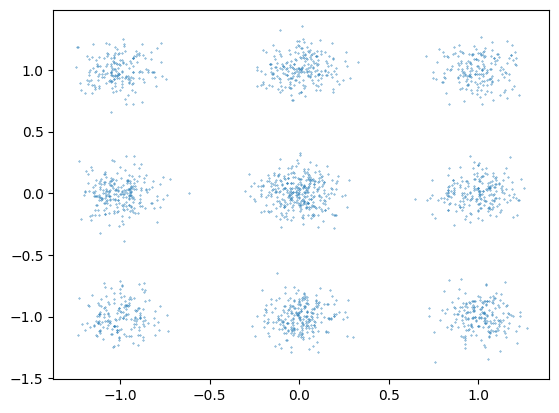

In [38]:
samples = logstat['samples']
plt.scatter(samples[:,0],samples[:,1], s = 0.1)